In [1]:
import tensorflow as tf


if tf.test.gpu_device_name():
  print('Available')
else:
  print('Its not available')

Its not available


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
!gdown 1mv0pkBWLufrEaIwZYN4_Hg0B7fGxRoAk
!gdown 1uAhXMC4Vcs5sS_Za981YxirnYuupahUr

Downloading...
From: https://drive.google.com/uc?id=1mv0pkBWLufrEaIwZYN4_Hg0B7fGxRoAk
To: /content/ASUS (2023 - 08.04.2024).csv
100% 22.1k/22.1k [00:00<00:00, 51.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uAhXMC4Vcs5sS_Za981YxirnYuupahUr
To: /content/ASUS (2000 - 11.07.2023).csv
100% 431k/431k [00:00<00:00, 107MB/s]


In [82]:
import pandas as pd


train_df = pd.read_csv('ASUS (2000 - 11.07.2023).csv')
test_df = pd.read_csv('ASUS (2023 - 08.04.2024).csv')

In [83]:
print(f'Train size: {train_df.shape}')
print(f'Test size: {test_df.shape}')

Train size: (5869, 7)
Test size: (298, 7)


In [84]:
train_df = train_df[['Date', 'Close']]
test_df = test_df[['Date', 'Close']]

### Working just with the train data :

In [85]:
train_df.head()

,Date,Close
0,2000-01-05,438.747223
1,2000-01-06,437.449310
2,2000-01-07,428.362701
3,2000-01-10,450.429901
4,2000-01-11,443.939606


In [86]:
train_df.describe()

,Close
count,5746.000000
mean,290.235818
std,75.602517
min,130.196335
25%,234.500000
50%,278.000000
75%,330.000000
max,565.188538


In [87]:
index_min = train_df['Close'].idxmin()
index_max = train_df['Close'].idxmax()

In [88]:
print(f'The Date of min was : {train_df.iloc[index_min, 0]}')
print(f'The Date of max was : {train_df.iloc[index_max, 0]}')

The Date of min was : 2003-02-27
The Date of max was : 2007-10-31


In [89]:
train_df[index_min:].head()

,Date,Close
821,2003-02-27,130.196335
822,2003-02-28,130.196335
823,2003-03-03,132.403030
824,2003-03-04,132.403030
825,2003-03-05,132.403030


In [90]:
train_df[index_max:].head()


,Date,Close
2011,2007-10-31,565.188538
2012,2007-11-01,555.272949
2013,2007-11-02,540.399597
2014,2007-11-05,547.836243
2015,2007-11-06,540.399597


### Analysing the graphics :

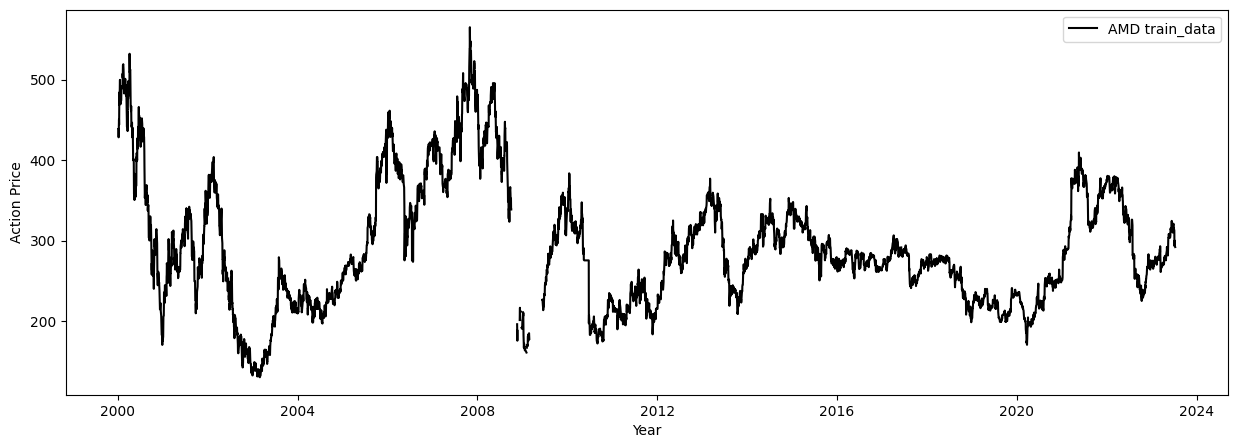

In [91]:
import matplotlib.pyplot as plt


train_df.loc[:, 'Date'] = pd.to_datetime(train_df['Date'])

plt.figure(figsize=(15,5))
plt.plot(train_df['Date'], train_df['Close'], color = 'black', label='ASUS train_data')
plt.xlabel('Year')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5869 entries, 0 to 5868
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5869 non-null   object 
 1   Close   5746 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.8+ KB


In [93]:
n = train_df['Close'].isna().sum()
print(f'Analysing the data we can speak that there are {n} NaN values')
print('We will fill them with the mean value')

Analysing the data we can speak that there are 123 NaN values
We will fill them with the mean value


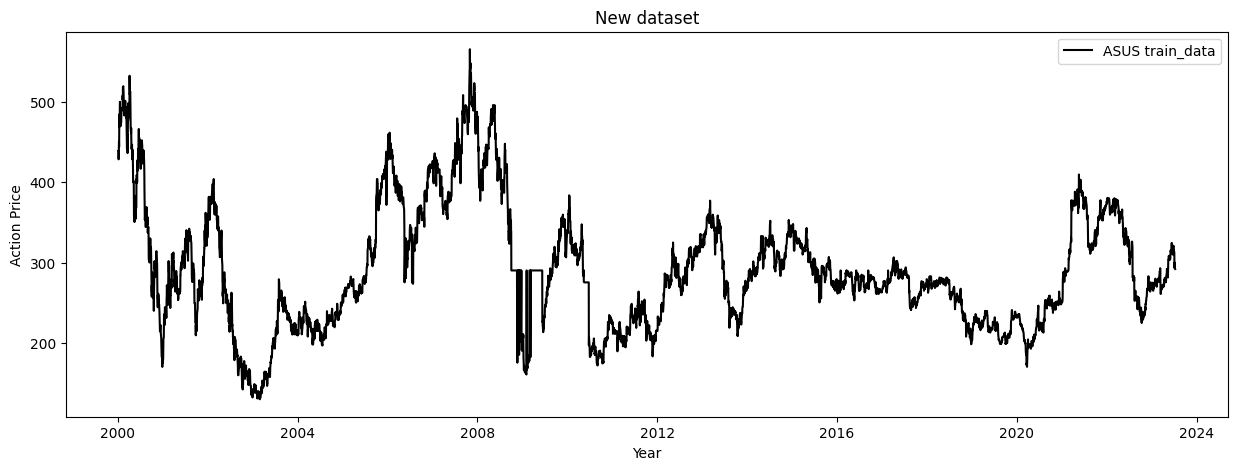

In [94]:

train_df['Close'] = train_df['Close'].fillna(train_df['Close'].mean()) # Filling the NaN values with the mean.

plt.figure(figsize=(15,5))
plt.plot(train_df['Date'], train_df['Close'], color = 'black', label='ASUS train_data')
plt.title('New dataset')
plt.xlabel('Year')
plt.ylabel('Action Price')
plt.legend()
plt.show()

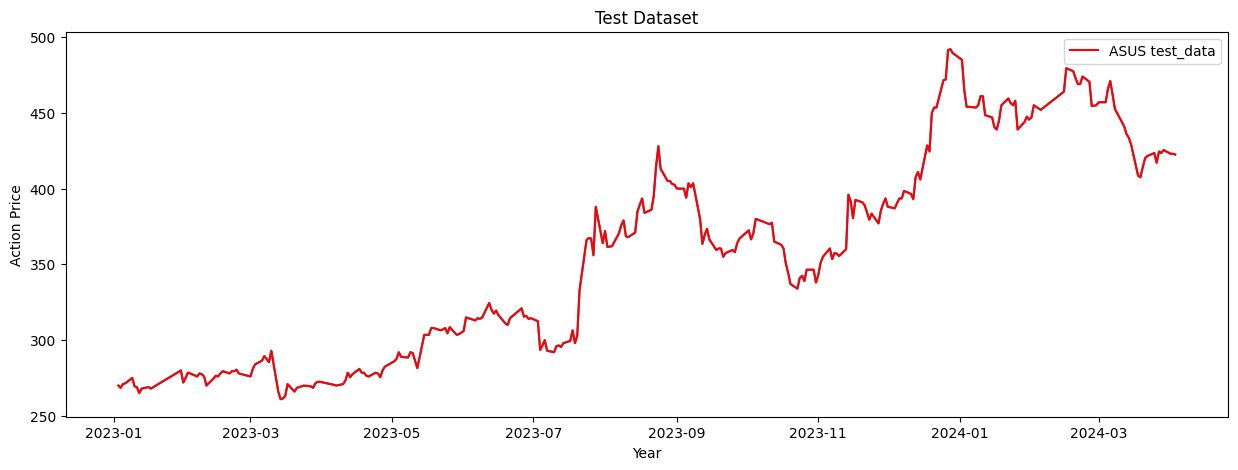

In [95]:

#Ploting the test data :

test_df.loc[:, 'Date'] = pd.to_datetime(test_df['Date'])

plt.figure(figsize=(15,5))
plt.plot(test_df['Date'], test_df['Close'])
plt.plot(test_df['Date'], test_df['Close'], color = 'red', label='ASUS test_data')
plt.title('Test Dataset')
plt.xlabel('Year')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [96]:
train_df.shape

(5869, 2)

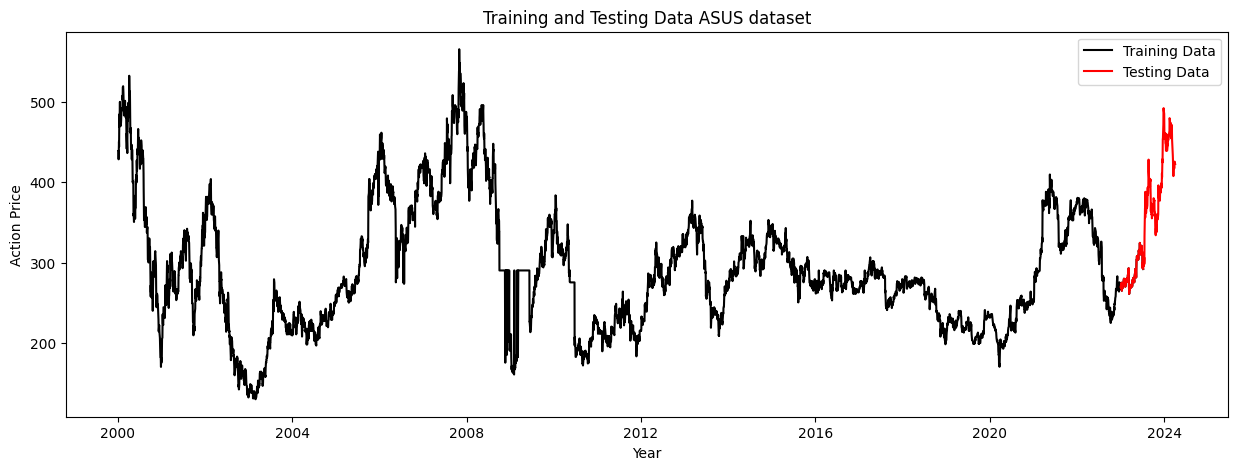

In [97]:

#Ploting both in sequence:
import numpy as np

plot_both = pd.concat([train_df, test_df], axis=0)



plt.figure(figsize=(15,5))
plt.plot(plot_both.iloc[:train_df.shape[0], 0], plot_both.iloc[:train_df.shape[0], 1], color = 'black', label = 'Training Data')
plt.plot(plot_both.iloc[train_df.shape[0]:, 0], plot_both.iloc[train_df.shape[0]:, 1], color = 'red', label = 'Testing Data')
plt.title('Training and Testing Data ASUS dataset')
plt.xlabel('Year')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [98]:
#train_df is ok, without be scaled
#test_df is ok, without be scaled

#### First we will use ARIMA and SARIMA :

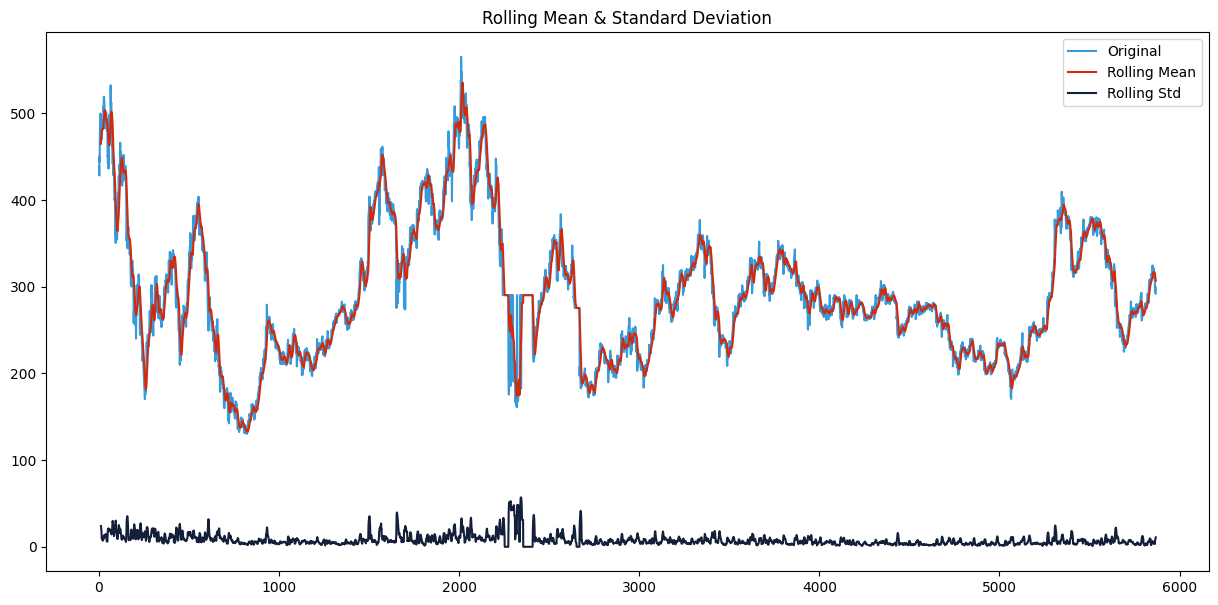

In [99]:
train_changed = train_df.copy()
train_changed["rolling_avg"] = train_changed["Close"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
train_changed["rolling_std"] = train_changed["Close"].rolling(window=12).std() #window size 12 denotes 12 months, giving rolling mean at yearly level


plt.figure(figsize=(15,7))
plt.plot(train_changed["Close"], color='#379BDB', label='Original')
plt.plot(train_changed["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(train_changed["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


#### We can see the data is non-stationary, because mean and std aren't constant in time.

In [100]:
from statsmodels.tsa.stattools import adfuller

#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(train_changed['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -4.106080
p-value                           0.000946
#Lags Used                       34.000000
Number of Observations Used    5834.000000
Critical Value (1%)              -3.431471
Critical Value (5%)              -2.862036
Critical Value (10%)             -2.567034
dtype: float64


In [101]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'Close' column
result = adfuller(train_changed['Close'].dropna())

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Print critical values
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic: -4.106079805580197
p-value: 0.0009463541498022255
Critical Value (1%): -3.4314713883450447
Critical Value (5%): -2.862035547981153
Critical Value (10%): -2.567033778108987


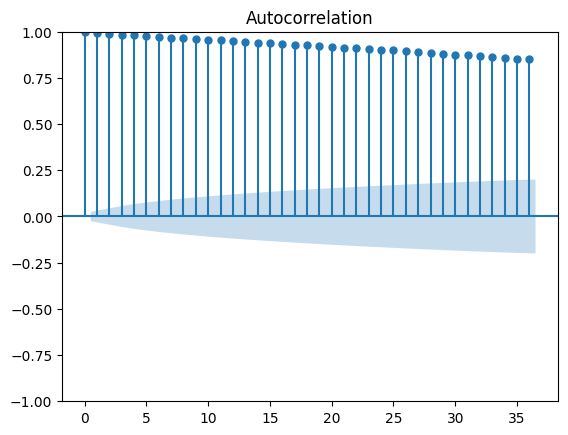

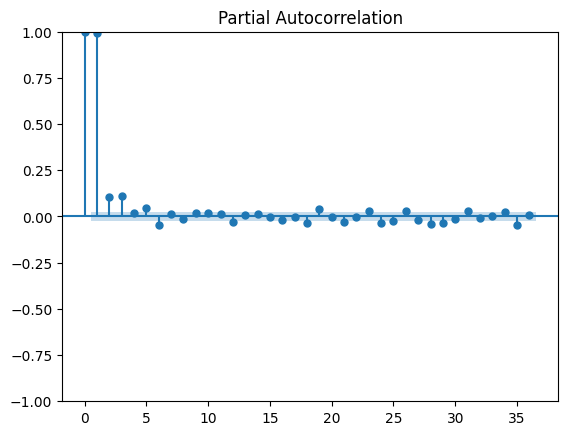

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Analysing the autocorrelation to find patterns :

plot_acf(train_df['Close'], lags=36)
plot_pacf(train_df['Close'], lags=36)
plt.show()

#### Building the ARIMA model :

In [103]:
!pip install pmdarima --quiet

In [104]:
import pmdarima as pm

#Standard ARIMA Model
ARIMA_model = pm.auto_arima(train_changed['Close'],
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

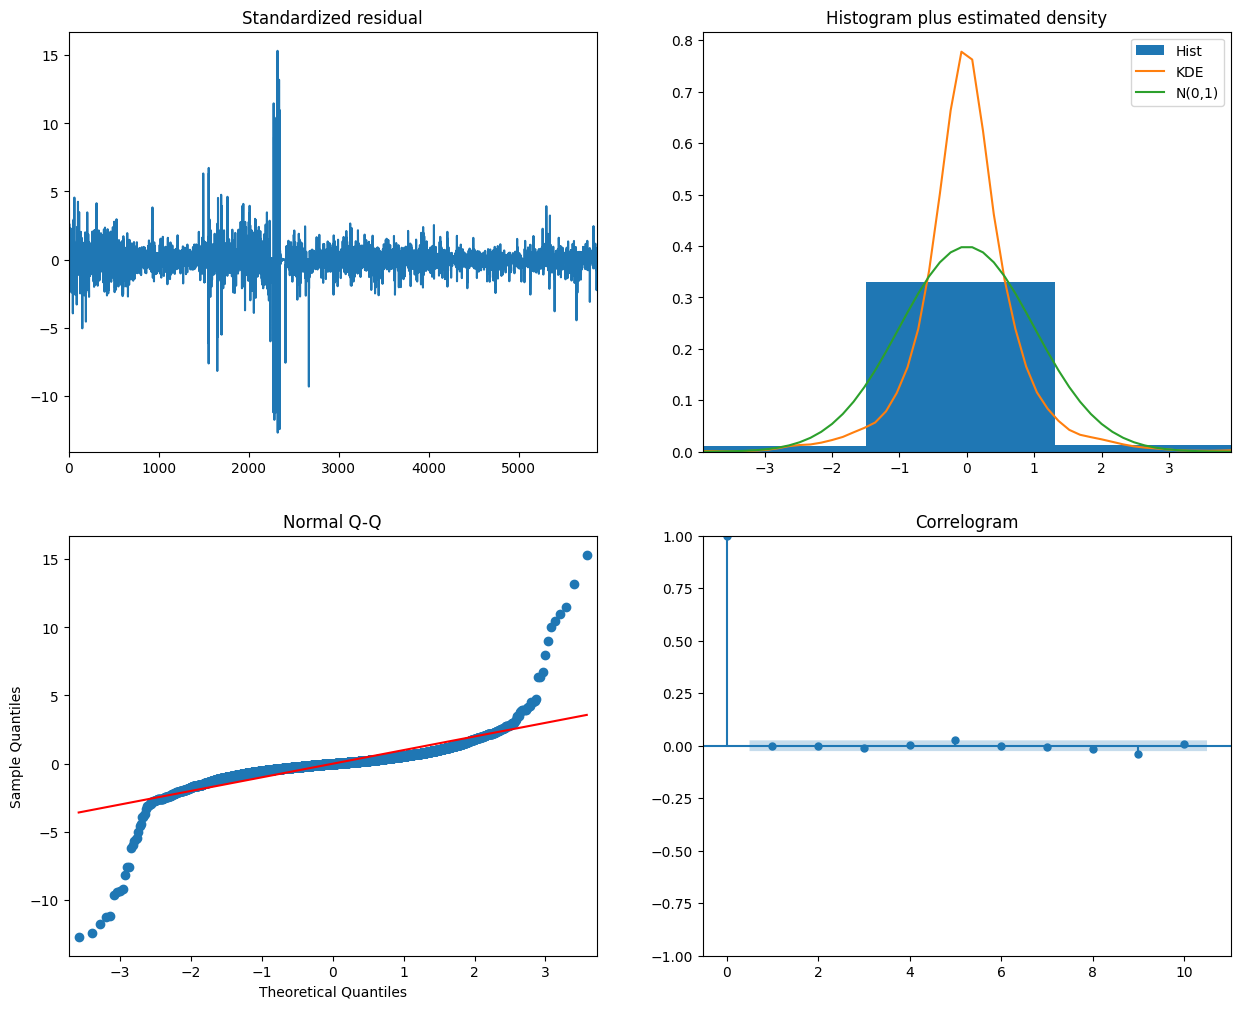

In [105]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [106]:
train_changed.index = pd.to_datetime(train_changed.index).normalize()
train_changed.index.shape

(5869,)

1970-01-02   NaN
1970-01-03   NaN
1970-01-04   NaN
1970-01-05   NaN
1970-01-06   NaN
              ..
1970-10-22   NaN
1970-10-23   NaN
1970-10-24   NaN
1970-10-25   NaN
1970-10-26   NaN
Length: 298, dtype: float64


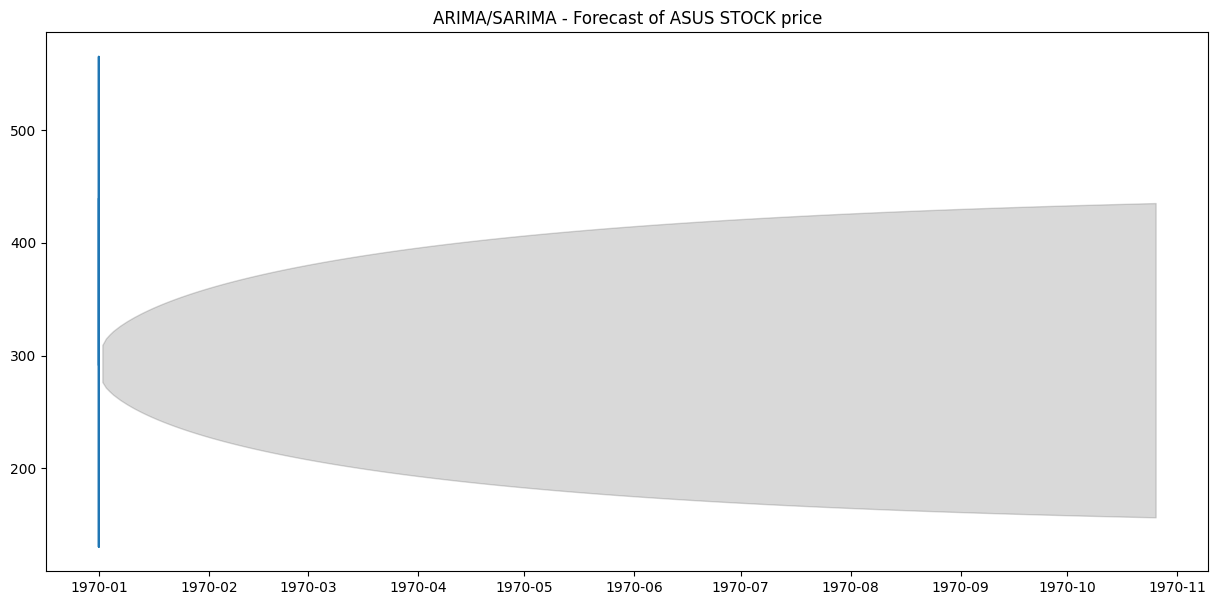

In [107]:
def forecast(ARIMA_model, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)

    # Ensure the index is properly formatted
    train_changed.index = pd.to_datetime(train_changed.index).normalize()

    # Generate the forecast index
    last_date = train_changed.index[-1]
    index_of_fc = pd.DatetimeIndex([last_date + pd.Timedelta(days=i+1) for i in range(n_periods)])


    # Make series for plotting
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(train_changed['Close'], color='#1f76b4')
    print(fitted_series)
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                     lower_series,
                     upper_series,
                     color='k', alpha=.15)
    plt.title("ARIMA/SARIMA - Forecast of ASUS STOCK price")
    plt.show()

forecast(ARIMA_model, periods=test_df.shape[0])


#### Building the SARIMA :

In [108]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(train_changed['Close'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3,
                         m=12, #12 is the frequncy of the cycle
                         start_P=0,
                         seasonal=True, #set to seasonal
                         d=None,
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

KeyboardInterrupt: 

In [ ]:
forecast(SARIMA_model, periods=test_df.shape[0])

#### Building RNN and LSTM model :

#### Looking seasonality :

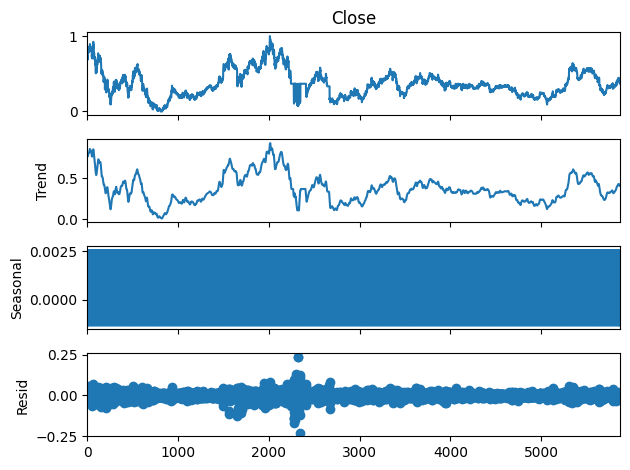

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

# Using a lot of data is hard to identify the seasonality.

train_df_changed = train_df.copy()

scaler = MinMaxScaler()
train_df_changed['Close'] = scaler.fit_transform(train_df_changed['Close'].values.reshape(-1, 1))

decompose = seasonal_decompose(train_df_changed['Close'], period = 12)
decompose.plot()
plt.show()


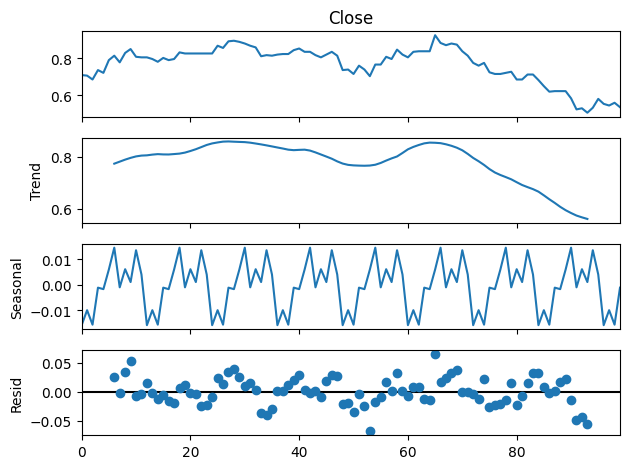

In [110]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Using less data we can see that data has a seasonality of 12.
decompose = seasonal_decompose(train_df_changed.iloc[:100, 1], period = 12)
decompose.plot()
plt.show()

#### Creating the window :

In [111]:
# Creating the window to train

def create_window(data, window_size=1) -> np.ndarray:
    X, y = [], []
    try:
        for i in range(len(data) - window_size):
            X.append(data[i:i + window_size])
            y.append(data[i + window_size])
    except Exception as e:
        print(f'Error: {e}')
    return np.array(X), np.array(y)

In [112]:
#Calculating the size of the training set
size_train = int(0.85 * len(train_df_changed))

# Slicing the data correctly
X_train, y_train = create_window(train_df_changed.iloc[:size_train, 1].values, window_size=12)
X_val, y_val = create_window(train_df_changed.iloc[size_train:, 1].values, window_size=12)

In [113]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_test shape: {y_val.shape}')

X_train shape: (4976, 12)
y_train shape: (4976,)
X_val shape: (869, 12)
y_test shape: (869,)


In [114]:
# Reshaping the values to be an input :

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [115]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_test shape: {y_val.shape}')

X_train shape: (4976, 12, 1)
y_train shape: (4976,)
X_val shape: (869, 12, 1)
y_test shape: (869,)


### RNN :

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

In [117]:
# Defining RNN model
model_RNN = Sequential()
model_RNN.add(SimpleRNN(units=128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_RNN.add(SimpleRNN(units=32))
model_RNN.add(Dense(units=64, activation='relu'))
model_RNN.add(Dropout(0.2))
model_RNN.add(Dense(units=32, activation='relu'))
model_RNN.add(Dropout(0.2))

model_RNN.add(Dense(units=1))

# Compile the model
model_RNN.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model_RNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 12, 128)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,017 (101.63 KB)

 Trainable params: 26,017 (101.63 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
# Get total number of parameters

total_params_RNN = model_RNN.count_params()
print(f'Total number of parameters: {total_params_RNN}')

Total number of parameters: 26017


In [119]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard


In [120]:

%time

# Define the callbacks
#early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint_RNN = ModelCheckpoint('best_model_RNN.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr_RNN = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
tensorboard_RNN = TensorBoard(log_dir='./logs', histogram_freq=1)


# Training the Model and store history
history_RNN = model_RNN.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data = (X_val, y_val),
                    callbacks=[model_checkpoint_RNN, reduce_lr_RNN, tensorboard_RNN])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0238 - mae: 0.1084 - val_loss: 0.0012 - val_mae: 0.0292 - learning_rate: 0.0010
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0065 - mae: 0.0586 - val_loss: 9.6759e-04 - val_mae: 0.0249 - learning_rate: 0.0010
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0041 - mae: 0.0465 - val_loss: 4.0819e-04 - val_mae: 0.0159 - learning_rate: 0.0010
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0034 - mae: 0.0411 - val_loss: 8.2982e-04 - val_mae: 0.0225 - learning_rate: 0.0010
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0030 - mae: 0.0379 - val_loss: 3.8484e-04 - val_mae: 0.0151 - learning_rate: 0.0010
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0024 - mae: 0.0336 - val_loss: 2.6767e-04 - val_mae: 0.0118 - learning_rate: 2.0000e-04
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step 

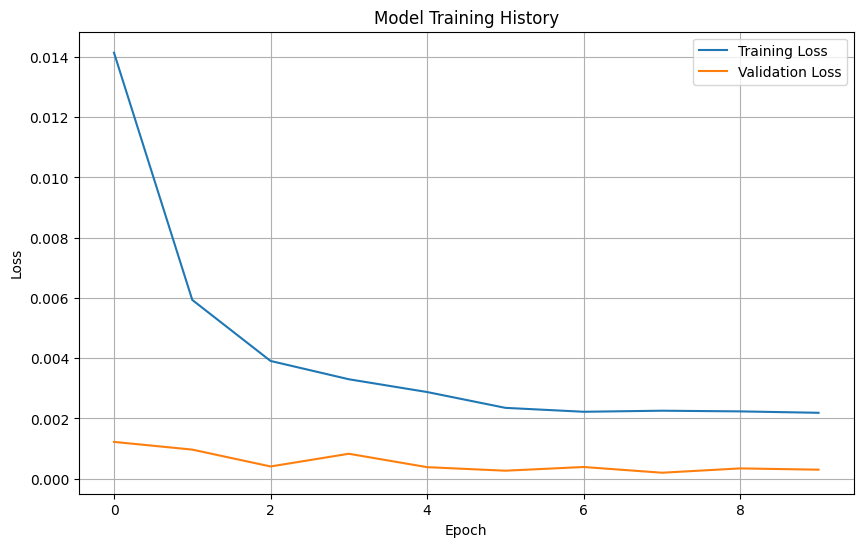

In [121]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_RNN.history['loss'], label='Training Loss')
plt.plot(history_RNN.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### Creating a window just for my predictions data :


In [122]:
def create_prediction_windows(data, window_size=1) -> np.ndarray:
    X = []
    for i in range(len(data) - window_size):  # Adjusted range for prediction
        X.append(data[i:i + window_size])
    return np.array(X)


In [123]:
X_train_to_pred = create_prediction_windows(train_df_changed.iloc[:, 1].values, window_size=12)
X_train_to_pred.shape

(5857, 12)

In [124]:
X_train_to_pred = X_train_to_pred.reshape(X_train_to_pred.shape[0], X_train_to_pred.shape[1], 1)
X_train_to_pred.shape

(5857, 12, 1)

#### Predicting my model:

In [125]:
pred_train_RNN = model_RNN.predict(X_train_to_pred)
pred_train_RNN = scaler.inverse_transform(pred_train_RNN)

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


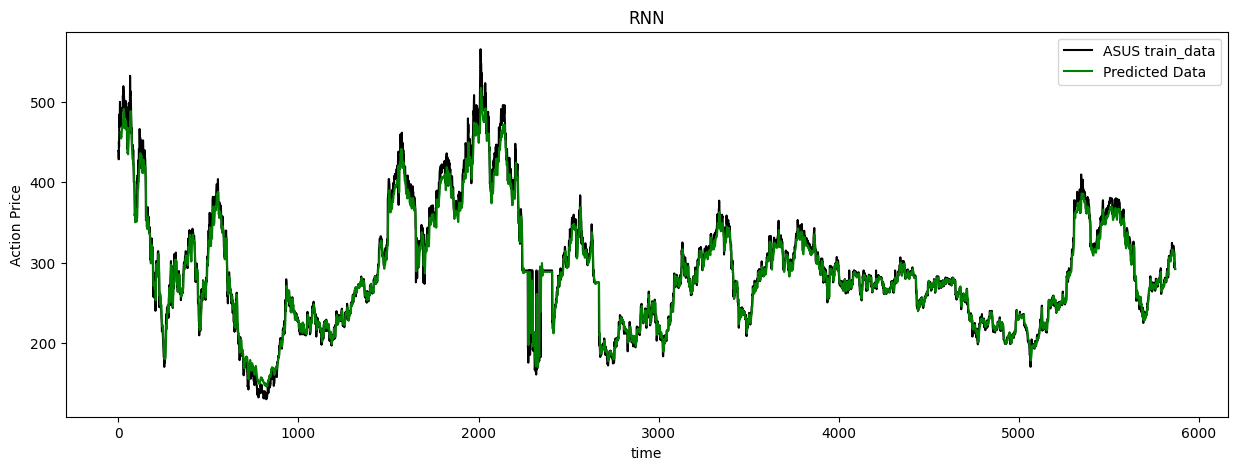

In [132]:
plt.figure(figsize=(15,5))
plt.plot(range(0, train_df.shape[0]), train_df['Close'], color = 'black', label='ASUS train_data')
plt.plot(range(12, pred_train_RNN.shape[0] + 12), pred_train_RNN, color = 'green', label = 'Predicted Data')
plt.title('RNN')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [133]:
train_df_changed

,Date,Close
0,2000-01-05 00:00:00,0.709325
1,2000-01-06 00:00:00,0.706341
2,2000-01-07 00:00:00,0.685452
3,2000-01-10 00:00:00,0.736182
4,2000-01-11 00:00:00,0.721262
...,...,...
5864,2023-07-04 00:00:00,0.375417
5865,2023-07-05 00:00:00,0.382314
5866,2023-07-06 00:00:00,0.390360
5867,2023-07-07 00:00:00,0.374268


In [139]:
X_val_pred = create_prediction_windows(train_df_changed.iloc[size_train:,1], window_size=12)

X_val_pred = X_val_pred.reshape(X_val_pred.shape[0], X_val_pred.shape[1], 1)

Val_pred_RNN = model_RNN.predict(X_val_pred)
Val_pred_RNN = scaler.inverse_transform(Val_pred_RNN)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [140]:
Val_pred_RNN

array([[229.22519],
       [231.2559 ],
       [231.41551],
       [231.25186],
       [231.76074],
       [232.87306],
       [233.79305],
       [236.0653 ],
       [234.39552],
       [233.31189],
       [234.15393],
       [233.93384],
       [232.30304],
       [232.33144],
       [233.31345],
       [232.34142],
       [230.75366],
       [230.66399],
       [232.02203],
       [231.81778],
       [232.35536],
       [231.56416],
       [233.50514],
       [233.56772],
       [234.30605],
       [234.5878 ],
       [234.45055],
       [234.3962 ],
       [234.99696],
       [235.30014],
       [228.01868],
       [225.62566],
       [223.70961],
       [224.03496],
       [222.85916],
       [222.89397],
       [223.19363],
       [223.00574],
       [222.5758 ],
       [221.45837],
       [221.32726],
       [220.73837],
       [219.39534],
       [218.20659],
       [218.09273],
       [218.60162],
       [217.36273],
       [215.87207],
       [214.04767],
       [212.40318],


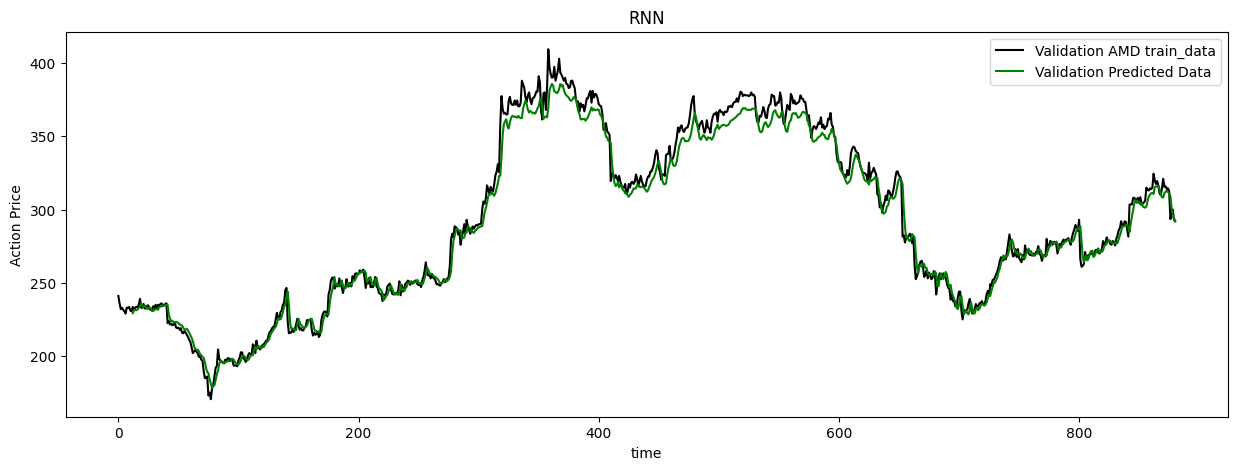

In [141]:

plt.figure(figsize=(15,5))
plt.plot(range(0, train_df.iloc[size_train:,].shape[0]), train_df.iloc[size_train:,1], color = 'black', label='Validation ASUS train_data')
plt.plot(range(12, Val_pred_RNN.shape[0] + 12), Val_pred_RNN, color = 'green', label = 'Validation Predicted Data')
plt.title('RNN in validation data')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

#### Using test data :

In [144]:
test_df.head()

,Date,Close
0,2023-01-03 00:00:00,270.0
1,2023-01-04 00:00:00,268.5
2,2023-01-05 00:00:00,271.0
3,2023-01-06 00:00:00,271.5
4,2023-01-09 00:00:00,275.0


In [149]:
test_df_changed =  scaler.fit_transform(test_df.iloc[:, 1].values.reshape(-1,1))

In [150]:
test_df_changed

array([[0.03896104],
       [0.03246753],
       [0.04329004],
       [0.04545455],
       [0.06060606],
       [0.03679654],
       [0.03463203],
       [0.01731602],
       [0.03030303],
       [0.03463203],
       [0.03030303],
       [0.08225108],
       [0.04761905],
       [0.06060606],
       [0.07575758],
       [0.07359307],
       [0.06493506],
       [0.07359307],
       [0.07142857],
       [0.06493506],
       [0.03896104],
       [0.05844156],
       [0.06709957],
       [0.06493506],
       [0.07359307],
       [0.08008658],
       [0.07359307],
       [0.08008658],
       [0.08008658],
       [0.08441558],
       [0.07359307],
       [0.06493506],
       [0.08658009],
       [0.0995671 ],
       [0.11038961],
       [0.12337662],
       [0.11471861],
       [0.10606061],
       [0.13852814],
       [0.02164502],
       [0.        ],
       [0.0021645 ],
       [0.00865801],
       [0.04329004],
       [0.02164502],
       [0.03246753],
       [0.03463203],
       [0.036

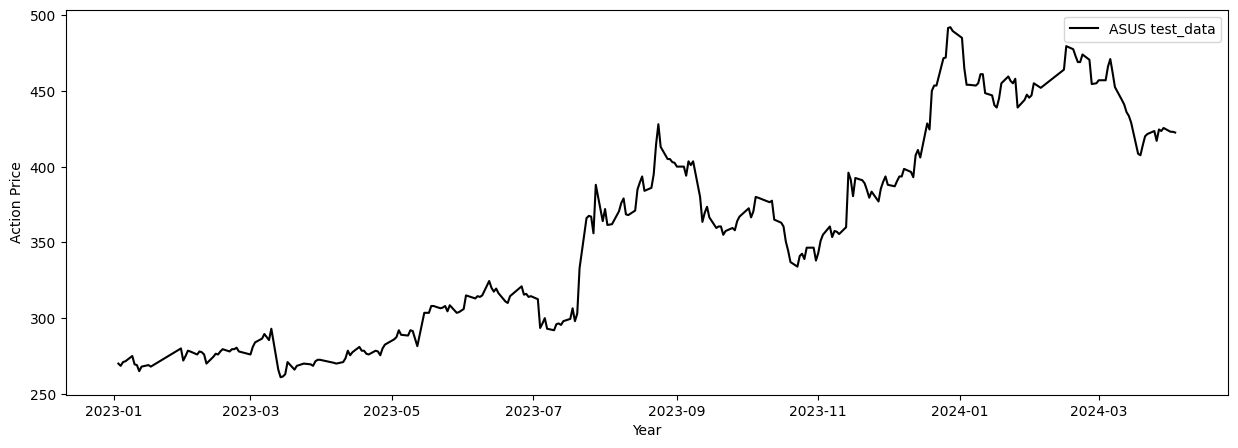

In [151]:
plt.figure(figsize=(15,5))
plt.plot(test_df['Date'], test_df['Close'], color = 'black', label='ASUS test_data')
plt.xlabel('Year')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [152]:
X_test = create_prediction_windows(test_df_changed, window_size=12)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

test_pred_RNN = model_RNN.predict(X_test)
test_pred_RNN = scaler.inverse_transform(test_pred_RNN)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


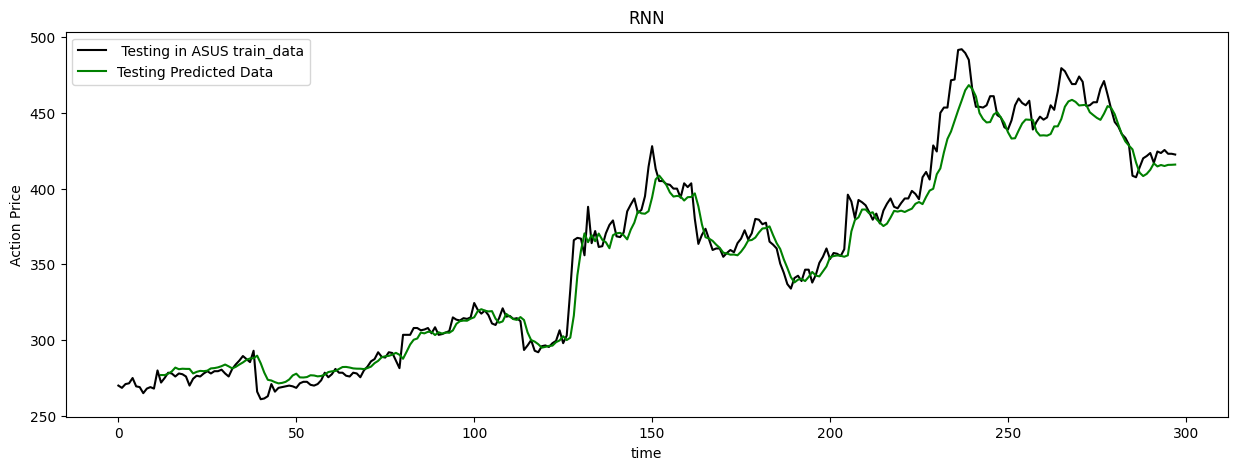

In [153]:
plt.figure(figsize=(15,5))
plt.plot(range(0, test_df.shape[0]), test_df['Close'], color = 'black', label=' Testing in ASUS train_data')
plt.plot(range(12, test_pred_RNN.shape[0] + 12), test_pred_RNN, color = 'green', label = 'Testing Predicted Data')
plt.title('RNN')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [154]:
test_pred_RNN

array([[276.97485],
       [276.9191 ],
       [277.85315],
       [279.31885],
       [281.87512],
       [280.81232],
       [281.129  ],
       [281.01306],
       [281.00507],
       [278.01236],
       [279.05698],
       [279.70535],
       [279.5146 ],
       [279.84848],
       [281.33585],
       [281.5469 ],
       [282.02637],
       [282.82184],
       [283.89444],
       [282.698  ],
       [281.3219 ],
       [282.3824 ],
       [283.90533],
       [285.28378],
       [286.96143],
       [287.9091 ],
       [288.04523],
       [289.75262],
       [284.75827],
       [278.5922 ],
       [273.806  ],
       [273.35266],
       [272.2659 ],
       [271.4593 ],
       [271.77365],
       [272.46735],
       [274.0041 ],
       [276.6991 ],
       [277.8511 ],
       [275.42365],
       [275.33524],
       [275.6278 ],
       [276.8223 ],
       [276.67   ],
       [276.0871 ],
       [276.34152],
       [277.23413],
       [278.93735],
       [279.40805],
       [279.671  ],


In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(actual_values, predicted_values):
    # Convert inputs to numpy arrays if they are not already
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(actual_values, predicted_values)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(actual_values, predicted_values)

    return mse, mae

mse_RNN, mae_RNN = calculate_metrics(test_df.iloc[12:,1].values, test_pred_RNN)
print(f'Mean Squared Error (MSE): {mse_RNN}')
print(f'Mean Absolute Error (MAE): {mae_RNN}')

Mean Squared Error (MSE): 130.46616338940103
Mean Absolute Error (MAE): 7.84858874340991


#### Now we will use a LSTM :

In [156]:
from tensorflow.keras.layers import LSTM
import keras

model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.LSTM(units=50, return_sequences=True))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.LSTM(units=50, return_sequences=True))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.LSTM(units=50))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.Dense(units=64))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.Dense(units=32))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.Dense(units=16))
model_LSTM.add(keras.layers.Dropout(0.2))
model_LSTM.add(keras.layers.Dense(units=1))


model_LSTM.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 50)              │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 12, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,289 (458.16 KB)

 Trainable params: 117,289 (458.16 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
# Get total number of parameters
total_params_LSTM = model_LSTM.count_params()
print(f'Total number of parameters: {total_params_LSTM}')

Total number of parameters: 117289


In [159]:
X_train.shape

(4976, 12, 1)

In [160]:
# Define the callbacks
#early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_LSTM_checkpoint = ModelCheckpoint('best_model_LSTM.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr_LSTM = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
tensorboard_LSTM = TensorBoard(log_dir='./logs', histogram_freq=1)


# Compiling the LSTM Model
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

# Training the Model and store history
history_LSTM = model_LSTM.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data = (X_val, y_val),
                    callbacks=[model_LSTM_checkpoint, reduce_lr_LSTM, tensorboard_LSTM])


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - loss: 0.0287 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0069 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0055 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - loss: 0.0046 - val_loss: 7.7016e-04 - learning_rate: 2.0000e-04
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - loss: 0.0046 - val_loss: 7.0908e-04 - learning_rate: 2.0000e-04
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.0044 - val_loss: 0.0010 - learning_rate: 2.0000e-04
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - loss: 0.0041 - val_loss: 6.8027e-04 - learning_rate: 4.0000e-05
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - loss: 0.0042 - val_loss: 6.6666e-04 - learning_rate: 4.0000e-05
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0043 -

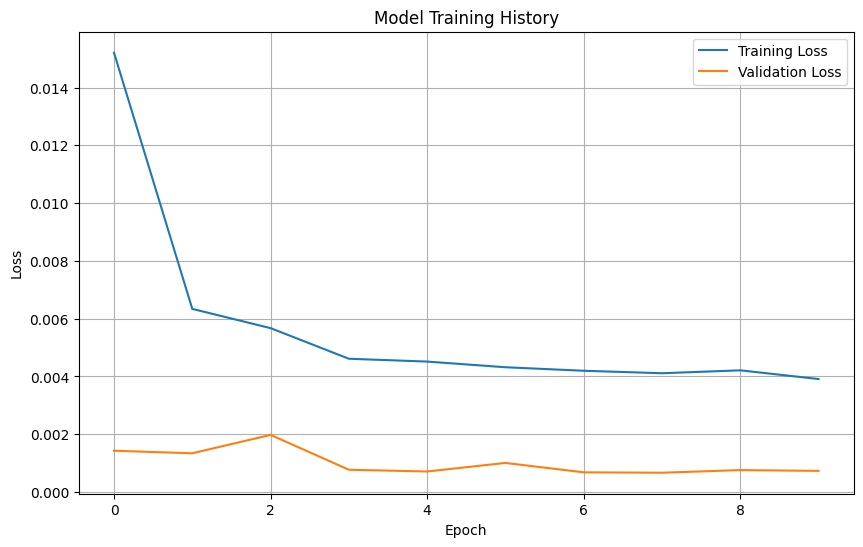

In [161]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_LSTM.history['loss'], label='Training Loss')
plt.plot(history_LSTM.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [162]:
pred_train_LSTM = model_LSTM.predict(X_train_to_pred)
pred_train_LSTM = scaler.inverse_transform(pred_train_LSTM)

184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


In [163]:
pred_train_LSTM

array([[429.49567],
       [432.1016 ],
       [434.42032],
       ...,
       [356.3049 ],
       [355.65274],
       [354.89725]], dtype=float32)

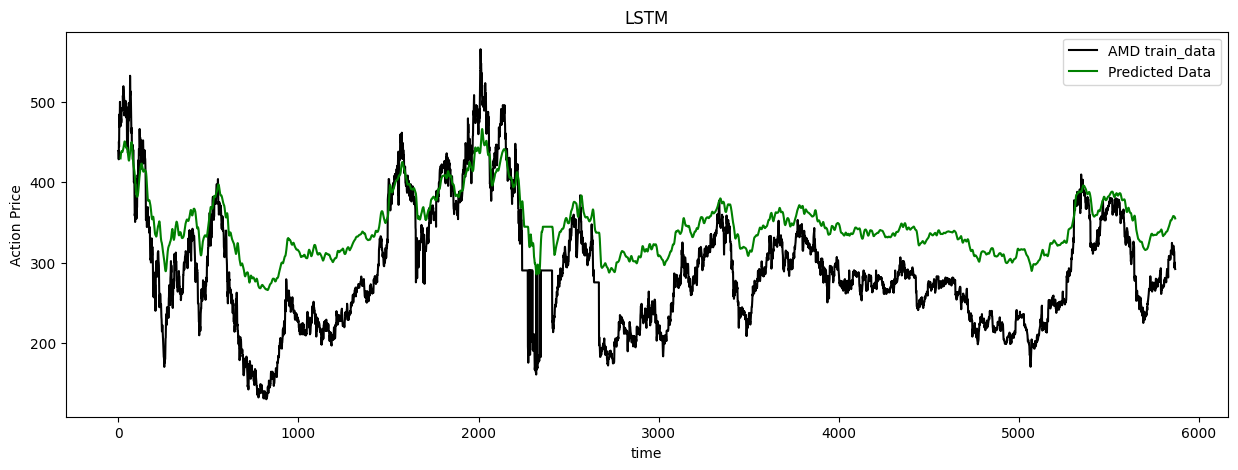

In [164]:
plt.figure(figsize=(15,5))
plt.plot(range(0, train_df.shape[0]), train_df['Close'], color = 'black', label='AMD train_data')
plt.plot(range(12, pred_train_LSTM.shape[0] + 12), pred_train_LSTM, color = 'green', label = 'Predicted Data')
plt.title('LSTM')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [165]:
X_val_pred_LSTM = X_val_pred.reshape(X_val_pred.shape[0], X_val_pred.shape[1], 1)

Val_pred_LSTM = model_LSTM.predict(X_val_pred)
Val_pred_LSTM = scaler.inverse_transform(Val_pred_LSTM)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


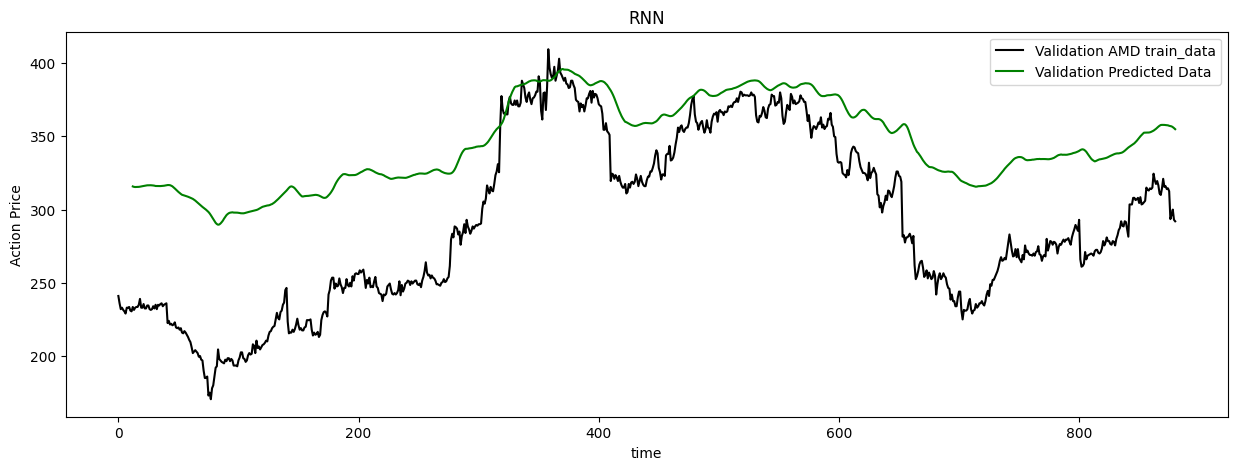

In [166]:
plt.figure(figsize=(15,5))
plt.plot(range(0, train_df.iloc[size_train:,].shape[0]), train_df.iloc[size_train:,1], color = 'black', label='Validation AMD train_data')
plt.plot(range(12, Val_pred_LSTM.shape[0] + 12), Val_pred_LSTM, color = 'green', label = 'Validation Predicted Data')
plt.title('RNN')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [167]:
test_pred_LSTM = model_LSTM.predict(X_test)
test_pred_LSTM = scaler.inverse_transform(test_pred_LSTM)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


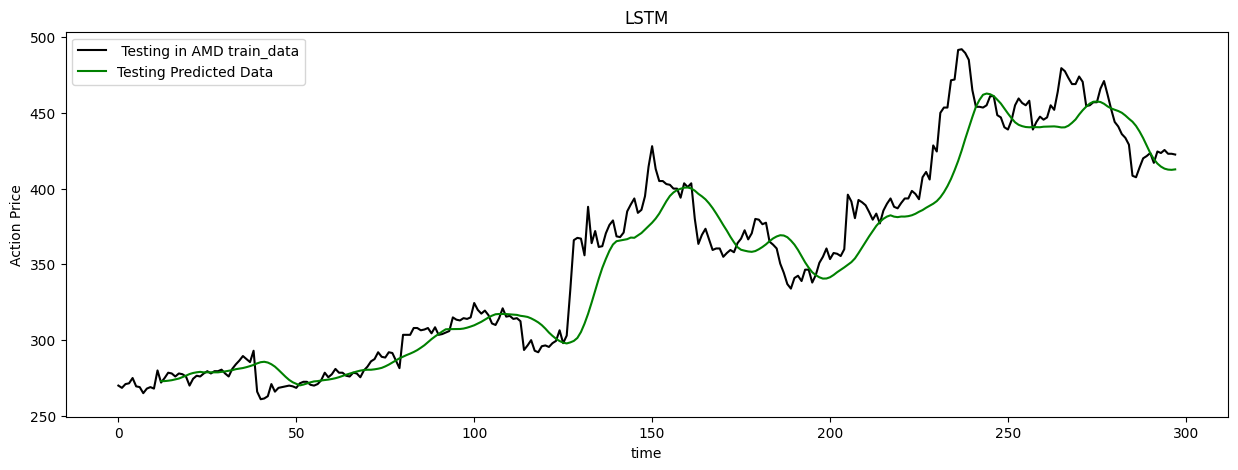

In [168]:
plt.figure(figsize=(15,5))
plt.plot(range(0, test_df.shape[0]), test_df['Close'], color = 'black', label=' Testing in AMD train_data')
plt.plot(range(12, test_pred_LSTM.shape[0] + 12), test_pred_LSTM, color = 'green', label = 'Testing Predicted Data')
plt.title('LSTM')
plt.xlabel('time')
plt.ylabel('Action Price')
plt.legend()
plt.show()

In [170]:
mse_LSTM, mae_LSTM = calculate_metrics(test_df.iloc[12:,1].values, test_pred_LSTM)
print(f'Mean Squared Error (MSE): {mse_LSTM}')
print(f'Mean Absolute Error (MAE): {mae_LSTM}')

Mean Squared Error (MSE): 397.0019599492824
Mean Absolute Error (MAE): 13.627510550972465


In [171]:
print(f'The MSE of RNN is : {mse_RNN}')
print(f'The MSE of LSTM is : {mse_LSTM}')
print(f'The MAE of RNN is : {mae_RNN}')
print(f'The MAE of LSTM is : {mae_LSTM}')

The MSE of RNN is : 130.46616338940103
The MSE of LSTM is : 397.0019599492824
The MAE of RNN is : 7.84858874340991
The MAE of LSTM is : 13.627510550972465
